In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler
)

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import re
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("data/drug200.csv")
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,Group
0,23.0,F,HIGH,25.355,NaN,C
1,NaN,M,HIGH,13.093,drugC,A
2,47.0,M,HIGH,NaN,drugC,C
3,28.0,F,HIGH,7.798,drugX,C
4,61.0,F,HIGH,18.043,NaN,A


In [4]:
df["Drug"].isna().sum()

np.int64(40)

In [5]:
df.dropna(axis=0, subset=['Drug'], inplace=True)
df["Drug"].isna().sum()

np.int64(0)

In [6]:
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,Group
1,NaN,M,HIGH,13.093,drugC,A
2,47.0,M,HIGH,NaN,drugC,C
3,28.0,F,HIGH,7.798,drugX,C
5,22.0,F,HIGH,8.607,drugX,A
6,49.0,F,HIGH,16.275,DrugY,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          124 non-null    float64
 1   Sex          160 non-null    object 
 2   Cholesterol  160 non-null    object 
 3   Na_to_K      128 non-null    float64
 4   Drug         160 non-null    object 
 5   Group        131 non-null    object 
dtypes: float64(2), object(4)
memory usage: 8.8+ KB


In [8]:
df.isna().sum()

Age            36
Sex             0
Cholesterol     0
Na_to_K        32
Drug            0
Group          29
dtype: int64

In [85]:
df["Group"].value_counts()

Group
A    45
C    43
B    43
Name: count, dtype: int64

In [86]:
order = {
    "A": 0,
    "B": 1,
    "C": 2
}
def transform(val):
    if type(val) == float: return np.nan
    return order[val]

In [87]:
df["Group"] = df["Group"].apply(transform)
print(df["Group"].isna().sum())
print(df["Group"].value_counts())

29
Group
0.0    45
2.0    43
1.0    43
Name: count, dtype: int64


In [88]:
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          124 non-null    float64
 1   Sex          160 non-null    int64  
 2   Cholesterol  160 non-null    object 
 3   Na_to_K      128 non-null    float64
 4   Drug         160 non-null    object 
 5   Group        131 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.8+ KB


In [89]:
ordinal_encoder = OrdinalEncoder(categories=[["NORMAL", "HIGH"]])
df["Cholesterol"] = ordinal_encoder.fit_transform(df[["Cholesterol"]])
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,Group
1,NaN,1,1.0,13.093,drugC,0.0
2,47.0,1,1.0,NaN,drugC,2.0
3,28.0,0,1.0,7.798,drugX,2.0
5,22.0,0,1.0,8.607,drugX,0.0
6,49.0,0,1.0,16.275,DrugY,2.0


In [90]:
df["Drug"] = label_encoder.fit_transform(df["Drug"])

<Axes: >

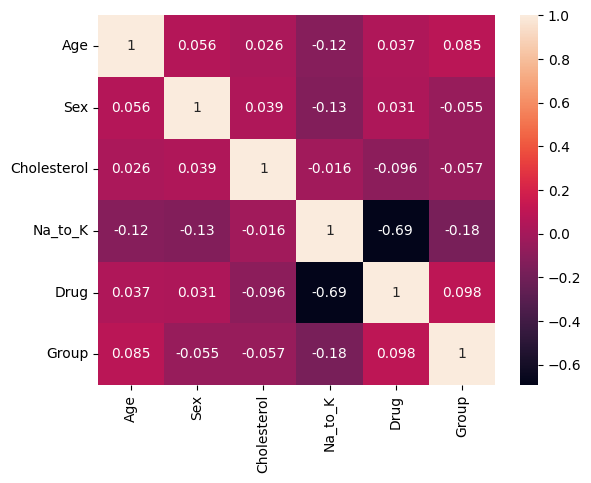

In [91]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: ylabel='Frequency'>

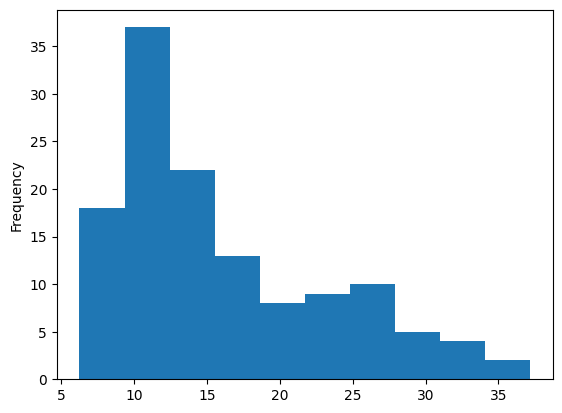

In [92]:
df["Na_to_K"].plot.hist()

In [93]:
df["Group"].value_counts()

Group
0.0    45
2.0    43
1.0    43
Name: count, dtype: int64

In [94]:
mean_imputer = SimpleImputer(strategy="median")
df[["Na_to_K"]] = mean_imputer.fit_transform(df[["Na_to_K"]])
df["Na_to_K"].isna().sum()


np.int64(0)

In [95]:
df.drop(columns=["Age"], inplace=True)

In [96]:
df.head()

,Sex,Cholesterol,Na_to_K,Drug,Group
1,1,1.0,13.0930,3,0.0
2,1,1.0,13.8515,3,2.0
3,0,1.0,7.7980,4,2.0
5,0,1.0,8.6070,4,0.0
6,0,1.0,16.2750,0,2.0


In [101]:
np.random.seed(42)
choices = [0, 1, 2]
df['Group'] = df['Group'].apply(lambda x: np.random.choice(choices) if pd.isna(x) else x)

In [102]:
df['Group'].value_counts()

Group
2.0    54
0.0    53
1.0    53
Name: count, dtype: int64

In [106]:
df["Drug"].value_counts()

Drug
0    74
4    45
1    18
3    14
2     9
Name: count, dtype: int64

In [108]:
X, y = df.drop(columns=["Drug"]), df["Drug"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [ ]:
# model = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16)
# model.fit(train_X, train_y)

# y_pred = model.predict(test_X)

/Users/Filip/Desktop/faks/semestar-5/vnp/VNP_2025-26/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:00:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print("Accuracy:", accuracy_score(test_y, y_pred))
# print(confusion_matrix(test_y, y_pred))
# print(classification_report(test_y, y_pred))

Accuracy: 0.625
[[14  0  0  1  3]
 [ 0  1  1  0  0]
 [ 0  2  0  2  0]
 [ 0  0  0  0  2]
 [ 1  0  0  0  5]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.50      0.83      0.62         6

    accuracy                           0.62        32
   macro avg       0.35      0.42      0.37        32
weighted avg       0.64      0.62      0.62        32



In [10]:
len(df)

160

<Axes: ylabel='Frequency'>

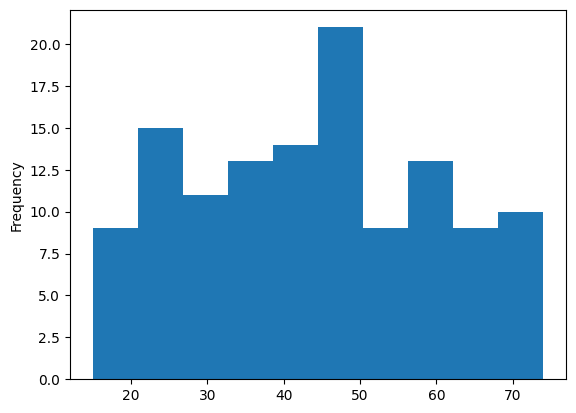

In [12]:
df["Age"].plot.hist()